In [1]:
import io
import numpy as np
from scipy.spatial import distance
import scipy.stats as stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

# PCA 

Principal component analysis is a technique which is primarily useful for **dimensionality reduction**.

There are several reasons why we might want to reduce the dimensionality of our data, especially as we deal with datasets which have an increasingly large number of features. For example, it's much easier to *visualize* a 2-D or 3-D representation of the data than a 7-D or 300-D dataset. Additionally, if we notice that some of the features are correlated with others or we just have computational efficiency concerns, then we can *extract new features* of a lower dimension. We might also consider dimensionality reduction to be a form of *noise reduction*, particularly when the dataset is standardized. 

In particular, PCA allows us to choose a new basis as a set of axes which maximize the variance of the original dataset. This is important because the variance is what we're typically interested in – we want . We can then project the original data onto that basis. Concretely, in order represent some dataset $\{x_{1}, \cdots, x_{n}\} \in \mathbb{R}^{d}$ in $k$ dimensions with PCA where $k < d$, we use the following steps.

1. Consider the dataset as a matrix $X \in \mathbb{R}^{n \times d}$ 
2. Center the dataset by subtracting the mean of each feature from each observation: $\bar{X} = X - \mu$. We might also standardize the dataset by dividing by the standard deviation of each feature.
3. Choose the first $k$ eigenvectors corresponding to the largest eigenvectors of the sample covariance matrix $\Sigma = \frac{1}{n-1}\bar{X}^{T}\bar{X}$. These are the first $k$ principal components, and we can arrange these components into a matrix where each column is such an eigenvector. Call this matrix $V_{k}$.
4. Project onto these eigenvectors: Proj $= \bar{X}V_{k}$

We do not need to explicitly compute the covariance matrix. Instead, we can use the singular value decomposition to get the principal components: $\bar{X} = UDV^{T}$. Then $(n-1)\Sigma = \bar{X}^{T}\bar{X} = VDD^{T}V^{T}$, which implies that the columns of $V$ are the eigenvectors of the covariance matrix $\Sigma$. 

Interestingly, the total variance of the dataset in this case is the sum of its singular values. It is thus possible to find the percentage of variance explained by a subset of the eigenvectors can be computed by taking the sum of the corresponding singular values divided by the total sum of the singular values.

I also have a more personal reason for wanting to highlight PCA. As a computational mathematics student at UCLA, several of my courses were proof-based math classes. While I enjoyed my linear algebra class, I wasn't entirely sure how [eigenvectors](https://en.wikibooks.org/wiki/Linear_Algebra/Eigenvalues_and_Eigenvectors) would be helpful outside of these proofs (where they are immensely helpful). PCA was one of the first techniques that I used in research, and I was actually able to connect the linear algebra to its effects on real-world data.

## Dataset

As a first example, we're loading a [dataset](https://archive.ics.uci.edu/ml/datasets/seeds) on measurements of geometrical properties of seeds belonging to three different varieties of wheat from the UC Irvine Machine Learning Repository. The dataset has 210 observations of 7 dimensions each. We try projecting the data into two and three principal components for visualization. If we were more interested in feature extraction, then we would want to use some method to choose the number of principal components. For example, we could plot the singular values and choose some threshold.

In [2]:
np.set_printoptions(precision=3)
seed_data = np.genfromtxt('data/seeds_dataset.txt')
stats.describe(seed_data)

DescribeResult(nobs=210, minmax=(array([10.59 , 12.41 ,  0.808,  4.899,  2.63 ,  0.765,  4.519,  1.   ]), array([21.18 , 17.25 ,  0.918,  6.675,  4.033,  8.456,  6.55 ,  3.   ])), mean=array([14.848, 14.559,  0.871,  5.629,  3.259,  3.7  ,  5.408,  2.   ]), variance=array([8.466e+00, 1.706e+00, 5.583e-04, 1.963e-01, 1.427e-01, 2.261e+00,
       2.416e-01, 6.699e-01]), skewness=array([ 0.397,  0.384, -0.534,  0.522,  0.133,  0.399,  0.558,  0.   ]), kurtosis=array([-1.087, -1.109, -0.165, -0.795, -1.1  , -0.093, -0.849, -1.5  ]))

In [3]:
seed_data = seed_data[:,0:7]

mean = np.mean(seed_data,axis=0)
std = np.std(seed_data, axis=0)
cov = np.cov(seed_data,rowvar=False)

In [4]:
centered_data = seed_data - mean
standardized_data = centered_data/std

In [5]:
u,s,v = np.linalg.svd(standardized_data, full_matrices = False)

In [6]:
proj = standardized_data.dot(v[:,:3])

#### First 2 principal components

With just two principal components explaining 71.61 percent of the variance in the data, we see meaningful separation between the different types of wheat. Plotting the projected data in this way demonstrates that way that PCA gives us a useful set of axes with which to represent the data.

The variance explained by the first two principal components is 71.61 percent


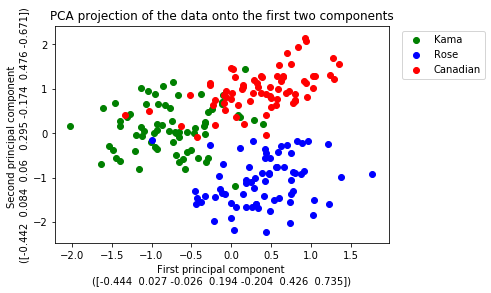

In [7]:
#first type: 0-69
#second type:70-139
#third type: 140-209 
t1 = np.arange(70)
t2 = np.arange(70,140)
t3 = np.arange(140,210)  

fig = plt.figure()
ax = fig.gca()
ax.scatter(proj[t1,0],proj[t1,1],color='g',label = 'Kama')
ax.scatter(proj[t2,0],proj[t2,1],color='b',label = 'Rose')
ax.scatter(proj[t3,0],proj[t3,1],color='r',label = 'Canadian')
plt.title('PCA projection of the data onto the first two components')
plt.xlabel('First principal component \n({})'.format(v[:,0]))
plt.ylabel('Second principal component \n({})'.format(v[:,1]))
plt.legend()
ax.legend(bbox_to_anchor=(1.3, 1.0))

print("The variance explained by the first two principal components is {:.2f} percent".format(sum(s[:2])/sum(s) * 100))

#### First 3 principal components

The variance explained by the first three principal components is 89.28 percent


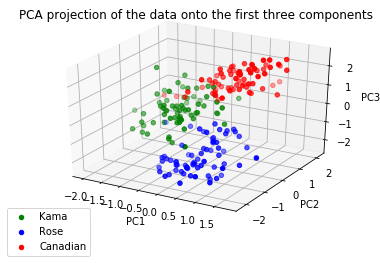

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')

scatter3d = ax.scatter(proj[t1,0],proj[t1,1],proj[t1,2],color='g',label = 'Kama')
scatter3d = ax.scatter(proj[t2,0],proj[t2,1],proj[t2,2],color='b',label = 'Rose')
scatter3d = ax.scatter(proj[t3,0],proj[t3,1],proj[t3,2],color='r',label = 'Canadian')
plt.title('PCA projection of the data onto the first three components')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(bbox_to_anchor=(0.2, 0.1))

print("The variance explained by the first three principal components is {:.2f} percent".format(sum(s[:3])/sum(s) * 100))

### Acknowledgments and other useful resources:
These sources provided helpful review material for me:
- [Principal component analysis Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)
- This blog post: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
- This StackExchange question gives a great intuitive understanding of PCA: https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
- This StackExchange question gives a great overview of how to perform PCA with SVD: https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
- The website for my (awesome) former TA Brett Bernstein's Data Science 1014: Optimization and Computational Linear Algebra Recitation: https://cims.nyu.edu/~brettb/linoptFall2018/index.html